In [1]:
import configparser
import numpy as np
from src.clustering.algorithm_wrappers.KMeansWrapper import KMeansWrapper
import pandas as pd

In [2]:
config = configparser.ConfigParser()
config.read('../../config.ini')
embedding_path = '../../' + config['DATA']['UserEmbeddingPath']
test_path = '../../' + config['DATA']['TestUserEmbeddingPath']


In [3]:
from sklearn.preprocessing import StandardScaler
import umap

user_embedding = np.load(embedding_path)  # todo get_historic_user_embeddings
test_embedding = np.load(test_path)

# standardize data
scaler = StandardScaler().fit(user_embedding)
user_embedding = scaler.transform(user_embedding)
test_embedding = scaler.transform(test_embedding)

# transform data
N_NEIGHBORS= int(config['UMAP']['n_neighbors'])
MIN_DIST= float(config['UMAP']['min_dist'])
N_COMPONENTS= int(config['UMAP']['n_components'])
METRIC=config['UMAP']['metric']
fit = umap.UMAP(
    n_neighbors= N_NEIGHBORS,
    min_dist= MIN_DIST,
    n_components= N_COMPONENTS,
    metric=METRIC
)

reducer = fit.fit(user_embedding)
user_red = reducer.transform(user_embedding)
user_test_red = reducer.transform(test_embedding)


/home/vera/uni/Master/SoSe23/EAI/04-continous-user-feedback/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera/uni/Master/SoSe23/EAI/04-continous-user-feedback/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera

In [4]:
model = KMeansWrapper()
model.train(user_red)
model.extract_representations(user_red)  # return tuple (clusterid, location)

In [ ]:
# model.visualize(user_red)
# model.figure.show()

In [30]:
# for each cluster get user frequencies
import json

# Opening JSON file
user_mapping = json.load(open('../../data/user_mapping.json'))

#load frequencies
df = pd.read_csv('../../data/wordclouds/user_category_frequency.csv')
user_category_frequ = df.loc[df['user'].isin(user_mapping.keys())]
del df
# put into wordcloud
# normalize wordcloud

In [31]:
user_category_frequ.iloc[:, 2:] = user_category_frequ.iloc[:, 2:].div(user_category_frequ.iloc[:, 2:].sum(axis=1), axis=0)
user_category_frequ

,Unnamed: 0,user,video,northamerica,sports,news,autos,kids,movies,lifestyle,middleeast,foodanddrink,music,travel,health,finance,entertainment,weather,tv
1,1,U91836,0.021053,0.0,0.031579,0.631579,0.000000,0.0,0.010526,0.063158,0.0,0.042105,0.010526,0.073684,0.010526,0.084211,0.000000,0.021053,0.000000
5,5,U19739,0.020833,0.0,0.208333,0.541667,0.020833,0.0,0.000000,0.041667,0.0,0.041667,0.020833,0.020833,0.041667,0.000000,0.020833,0.000000,0.020833
10,10,U89744,0.009434,0.0,0.471698,0.150943,0.000000,0.0,0.028302,0.132075,0.0,0.000000,0.037736,0.000000,0.009434,0.056604,0.075472,0.009434,0.018868
12,12,U92486,0.010000,0.0,0.340000,0.310000,0.000000,0.0,0.070000,0.080000,0.0,0.040000,0.020000,0.000000,0.010000,0.060000,0.020000,0.000000,0.040000
13,13,U29155,0.000000,0.0,0.259740,0.155844,0.025974,0.0,0.077922,0.025974,0.0,0.038961,0.116883,0.012987,0.064935,0.038961,0.103896,0.012987,0.064935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34768,34768,U59698,0.021978,0.0,0.032967,0.274725,0.021978,0.0,0.043956,0.230769,0.0,0.054945,0.043956,0.054945,0.032967,0.021978,0.043956,0.021978,0.098901
36382,36382,U64289,0.000000,0.0,0.037037,0.666667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.074074,0.111111,0.000000,0.111111
36457,36457,U61054,0.016129,0.0,0.322581,0.338710,0.016129,0.0,0.032258,0.016129,0.0,0.000000,0.016129,0.000000,0.032258,0.048387,0.032258,0.064516,0.064516
38091,38091,U16852,0.000000,0.0,0.000000,0.133333,0.000000,0.0,0.066667,0.400000,0.0,0.000000,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.133333


In [32]:
labels = model.model.predict(user_red)
cluster_in = (labels == 0).nonzero()[0]

cluster_user_ids = [key for key in user_mapping if user_mapping[key] in cluster_in]
cluster_freq = user_category_frequ.loc[user_category_frequ['user'].isin(cluster_user_ids)]

In [33]:
freq = cluster_freq.iloc[:, 2:].sum()
freq

video             2.124670
northamerica      0.000000
sports           20.306648
news             37.253301
autos             3.470735
kids              0.000000
movies            3.563655
lifestyle        11.934246
middleeast        0.000000
foodanddrink      5.466149
music             4.546649
travel            3.329118
health            4.444089
finance          10.328564
entertainment     3.769267
weather           1.552237
tv                7.910671
dtype: float64

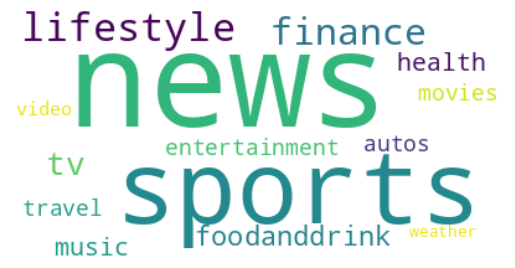

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate_from_frequencies(freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

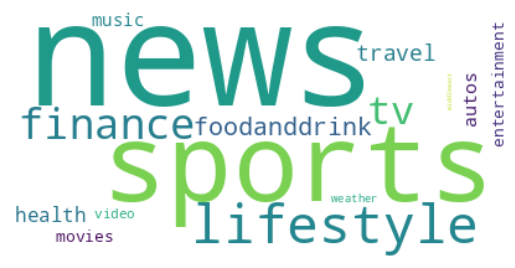

In [35]:
for cluster in range(int(config['Clustering']['NoClusters'])):
   # get ids of cluster
    cluster_in = (labels == cluster).nonzero()[0]
    cluster_user_ids = [key for key in user_mapping if user_mapping[key] in cluster_in]
    cluster_freq = user_category_frequ.loc[user_category_frequ['user'].isin(cluster_user_ids)]

    # get total sum (not normalized)
    freq = cluster_freq.iloc[:, 2:].sum()

    wordcloud = WordCloud(background_color="white").generate_from_frequencies(freq)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    wordcloud.to_file(f"../../data/wordclouds/{cluster}_wordcloud.png")
